In [18]:
import pandas as pd
import mne 
import pandas 
import glob 
import os 


from datamaking import CSVDataHandler


import matplotlib.pyplot as plt

ImportError: cannot import name 'CSVDataHandler' from 'datamaking' (/Users/sumitpandey/Downloads/EEG-consciousness/src/datamaking.py)

# Step 1: Convert all edf files to .csv

In [2]:

# get the names of edf files 
edf_files = os.listdir("/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/")
edf_files 
i = 0
edf_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/"+edf_files[i] # edf file path 
 
csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/"+edf_files[i][:-3]+'csv' # where the files will be saved 

In [16]:


# run a loop to convert the all edf files to .csv 

for i in range(len(edf_files)):
    edf_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/EDF files/"+edf_files[i]

    csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/"+edf_files[i][:-3]+'csv'
    convert_edf_to_csv(edf_file_path, csv_file_path)

Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/10GK-EDF+1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1209999  =      0.000 ...  4839.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/01CX-EDF+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77249  =      0.000 ...   308.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/01CX-EDF+1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 898749  =      0.000 ...  3594.996 secs...
Extracting EDF parameters from /Users/sumitpandey/Downloads/EEG-consciousness/EDF files/09FN-EDF+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1243249  =      0.000 ...  4972.996 secs...
Extracting EDF pa

### Step 2: Devide the dataset into two parts: training and testing dataset (for the time being i am doin this part manually)

# read few file show data:

In [7]:
from datamaking import print_csv_columns
i = 0
csv_file_path = "/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train/"+edf_files[i][:-3]+'csv'


print_csv_columns(csv_file_path)

'/Users/sumitpandey/Downloads/EEG-consciousness/input_data/train/10GK-EDF+1.csv'

Histogram saved as '10GK-EDF+1.png.png'


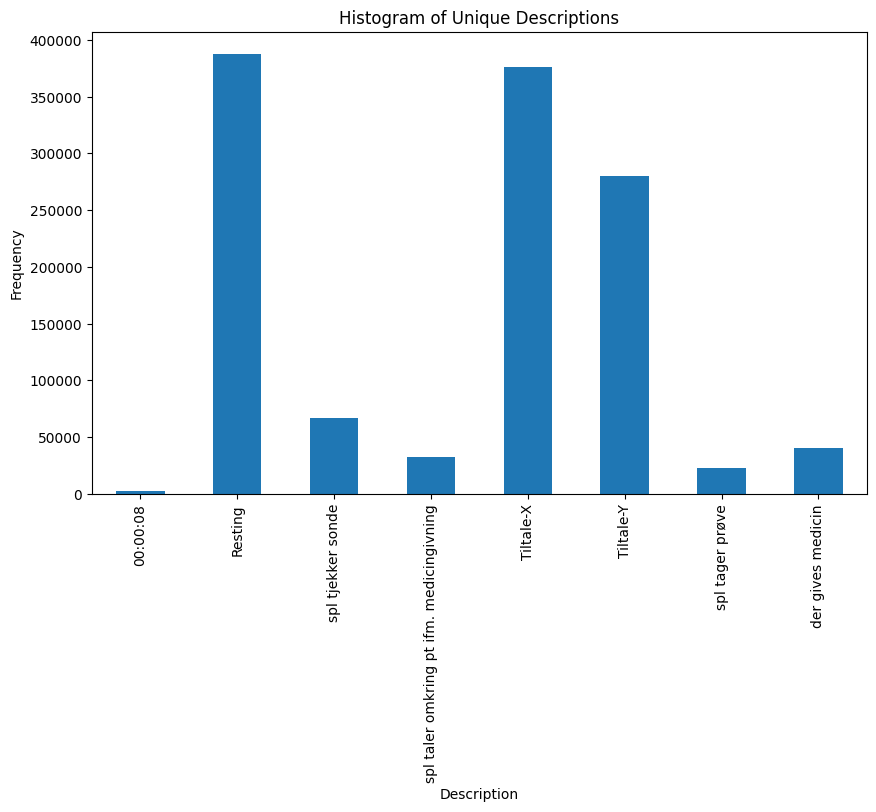

In [15]:
def plot_description_histogram(csv_file_path, output_file_name):
    # Read the .csv file using pandas
    df = pd.read_csv(csv_file_path)
    
    # Check if the 'description' column exists
    if 'description' not in df.columns:
        print("The file does not contain a 'description' column.")
        return
    
    # Extract unique values from the 'description' column
    unique_descriptions = df['description'].dropna().unique()
    
    # Count the occurrences of each unique description
    description_counts = df['description'].value_counts().loc[unique_descriptions]
    
    # Plot a histogram of the unique description counts
    plt.figure(figsize=(10, 6))
    description_counts.plot(kind='bar')
    plt.title('Histogram of Unique Descriptions')
    plt.xlabel('Description')
    plt.ylabel('Frequency')
    
    # Save the histogram as a .png file
    plt.savefig(f'{output_file_name}.png')
    print(f"Histogram saved as '{output_file_name}.png'")

# Example usage:
# Replace 'your_csv_file_path.csv' with the actual path to your .csv file
# and 'output_histogram' with your desired output file name (without extension)
# plot_description_histogram('your_csv_file_path.csv', 'output_histogram')

plot_description_histogram(csv_file_path, edf_files[i][:-3]+'png')

# Step 3: make a machine learning model